In [4]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(ggplot2)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [1]:
#install.packages("caret")
#library(caret)


In [24]:
data <- read_csv("data/vaccination-coverage-byAgeAndSex-overTimeDownload.csv")
data

Rows: 73584 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): prename, prfname, sex, age, numtotal_atleast1dose, numtotal_parti...
dbl   (4): pruid, numtotal_additional, numtotal_2nd_additional, numtotal_rec...
date  (1): week_end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pruid,prename,prfname,week_end,sex,age,numtotal_atleast1dose,numtotal_partially,numtotal_fully,numtotal_additional,numtotal_2nd_additional,numtotal_recent_fullyoradditional,proptotal_atleast1dose,proptotal_partially,proptotal_fully,proptotal_additional,proptotal_2nd_additional,proptotal_recent_fullyoradditional
<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Canada,Canada,2020-12-19,All sexes,0–15,2,2,0,NA,NA,NA,<0.1,<0.1,0,NA,NA,NA
1,Canada,Canada,2020-12-19,All sexes,16–69,11766,11766,0,NA,NA,NA,0.1,0.1,0,NA,NA,NA
1,Canada,Canada,2020-12-19,All sexes,70–74,174,174,0,NA,NA,NA,<0.1,<0.1,0,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
62,Nunavut,Nunavut,2022-10-09,Not reported,All ages,0,0,0.0,0,0,NA,na,na,na,na,na,na
62,Nunavut,Nunavut,2022-10-09,Not reported,Not reported,0,0,0.0,0,0,NA,na,na,na,na,na,na
62,Nunavut,Nunavut,2022-10-09,Not reported,Unknown,0,0,0.0,0,0,NA,na,na,na,na,na,na


In [25]:
data_allsex_canada<- data|>
filter(prename=="Canada")|>
filter(sex=="All sexes")|>
mutate(numtotal_atleast1dose=as.numeric(numtotal_atleast1dose))|>
mutate(numtotal_fully=as.numeric(numtotal_fully))|>
mutate(numtotal_additional=as.numeric(numtotal_additional))|>
mutate(numtotal_partially=as.numeric(numtotal_partially))

data2<-data_allsex_canada |> 
    select(week_end:numtotal_recent_fullyoradditional, -sex)

raw codes

In [32]:
newdata<- data2|>
    mutate(days=as.numeric(week_end)-18615)|>
    select(-week_end)

In [33]:
newnewdata <- newdata|>
mutate(days=days)|>
mutate(numtotal_atleast1dose=as.vector(numtotal_atleast1dose))|>
mutate(dose1=as.vector(numtotal_partially))|>
mutate(dose2=as.vector(numtotal_fully))|>
mutate(dose3=as.vector(numtotal_additional))|>
mutate(dose4=as.vector(numtotal_2nd_additional))|>
mutate(dose5=as.vector(numtotal_recent_fullyoradditional))|>
select(-numtotal_recent_fullyoradditional,-numtotal_2nd_additional,-numtotal_fully,-numtotal_partially,-numtotal_additional)
newnewdata

age,numtotal_atleast1dose,days,dose1,dose2,dose3,dose4,dose5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0–15,2,0,2,0,NA,NA,NA
16–69,11766,0,11766,0,NA,NA,NA
70–74,174,0,174,0,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
All ages,32320750,659,2699276,24262099,19293898,5571873,6682289
Not reported,0,659,0,0,0,0,NA
Unknown,15020,659,2670,12350,7873,3344,5978


In [34]:
na_row_total<- nrow(newnewdata[is.na(newnewdata$numtotal_atleast1dose),])
na_row_total
na_row_1<- nrow(newnewdata[is.na(newnewdata$dose1),])
na_row_1
na_row_2<- nrow(newnewdata[is.na(newnewdata$dose2),])
na_row_2
na_row_3<- nrow(newnewdata[is.na(newnewdata$dose3),])
na_row_3
na_row_4<- nrow(newnewdata[is.na(newnewdata$dose4),])
na_row_4
na_row_5<- nrow(newnewdata[is.na(newnewdata$dose5),])
na_row_5

[1] 0

[1] 0

[1] 0

[1] 564

[1] 629

[1] 866

In [35]:
newdata18<-newnewdata|>filter(age=="18–29")
newdata18

age,numtotal_atleast1dose,days,dose1,dose2,dose3,dose4,dose5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18–29,489425,119,404849,84576,NA,NA,NA
18–29,599663,126,509309,90354,NA,NA,NA
18–29,723344,133,623251,100093,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
18–29,5327857,603,219854,5108003,2160093,89940,232752
18–29,5327031,631,220689,5106342,2171600,122158,228081
18–29,5213720,659,652822,4072640,2250706,177328,348460


In [76]:

x<-newnewdata$days
y<-newnewdata$dose1

bbb<-glm(numtotal_atleast1dose~days, data=newdata18)


ypred<-bbb x

plot<- plot(ypred~x)+
lines(x,predict(bbb))
plot

ERROR: Error in parse(text = x, srcfile = src): <text>:8:12: unexpected symbol
7: 
8: ypred<-bbb x
              ^


integer(0)

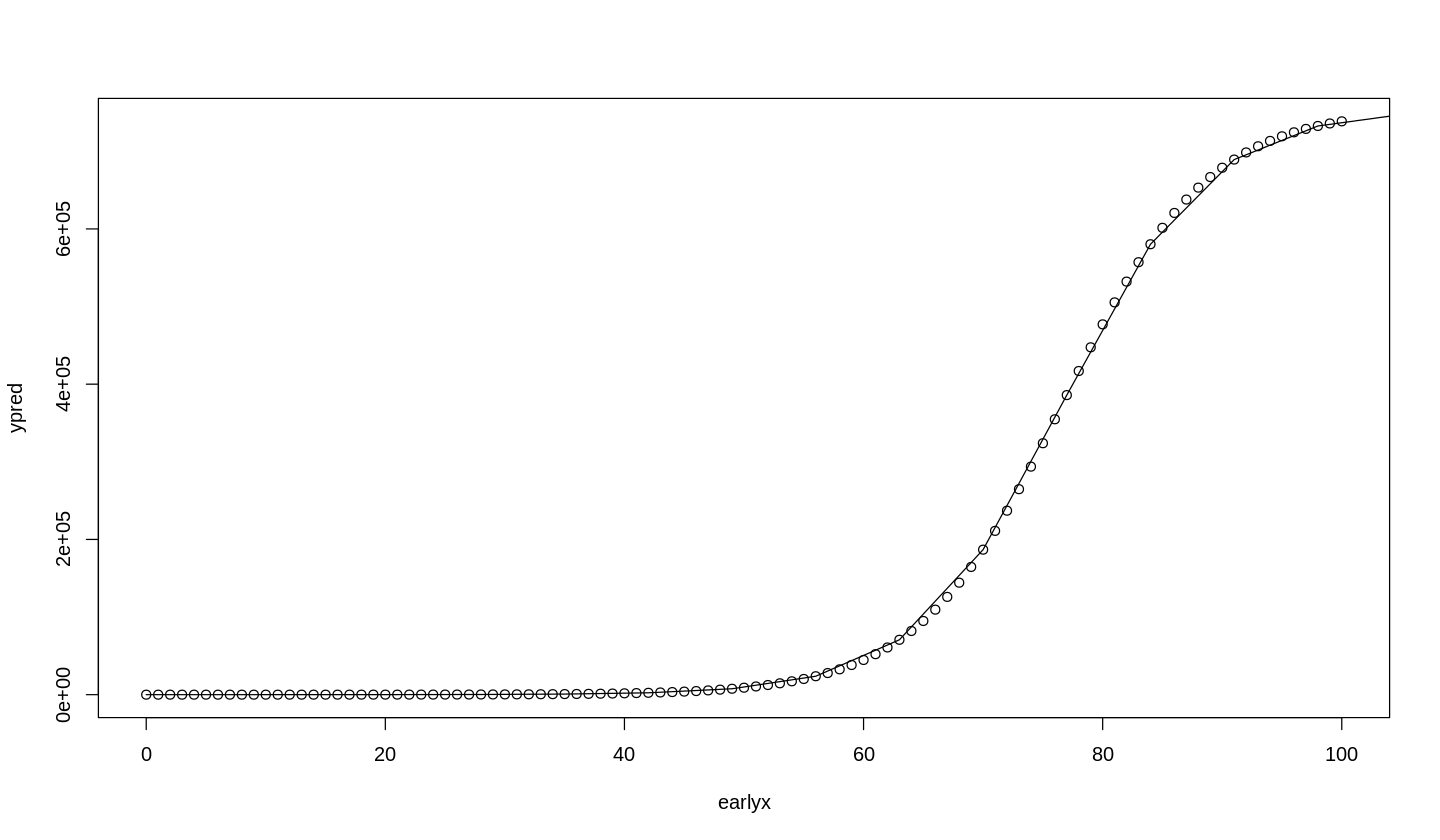

In [71]:
options(repr.plot.width = 12, repr.plot.height = 7)

x<-newnewdata$days
y<-newnewdata$dose1

bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:100)
ypred<-aaa[3]/(1 + exp((aaa[1] - earlyx)/aaa[2]))

plot<- plot(ypred~earlyx)+
lines(x,predict(bbb))
plot

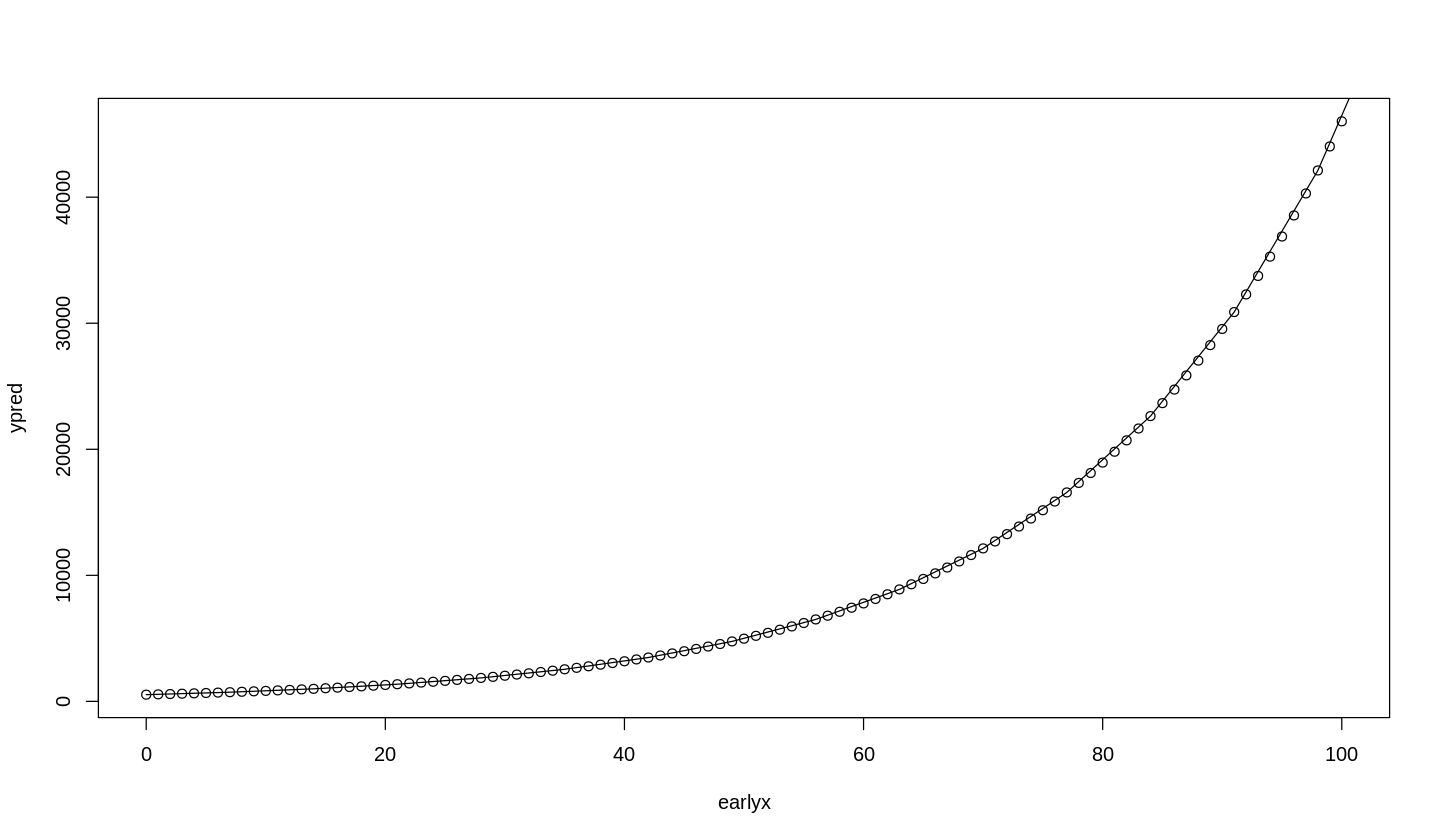

In [38]:
x<-newnewdata$days
y<-newnewdata$dose2

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:100)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

In [60]:
newnewdata2<-newnewdata|>filter(!is.na(dose3))
newnewdata2

age,numtotal_atleast1dose,days,dose1,dose2,dose3,dose4,dose5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0–4,243,357,243,0,0,NA,NA
05–11,911019,357,879598,31421,13,NA,NA
12–17,2140128,357,109844,2030284,2285,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
All ages,32320750,659,2699276,24262099,19293898,5571873,6682289
Not reported,0,659,0,0,0,0,NA
Unknown,15020,659,2670,12350,7873,3344,5978


In [62]:
x<-newnewdata2$days
y<-newnewdata2$dose3

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:100)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

ERROR: Error in nlsModel(formula, mf, start, wts, scaleOffset = scOff, nDcentral = nDcntr): singular gradient matrix at initial parameter estimates


In [63]:
x<-newnewdata$days
y<-newnewdata$dose4 


options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:100)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

ERROR: Error in nlsModel(formula, mf, start, wts, scaleOffset = scOff, nDcentral = nDcntr): singular gradient matrix at initial parameter estimates


In [64]:
x<-newnewdata$days
y<-newnewdata$dose5

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)), 
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:100)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

ERROR: Error in nlsModel(formula, mf, start, wts, scaleOffset = scOff, nDcentral = nDcntr): singular gradient matrix at initial parameter estimates


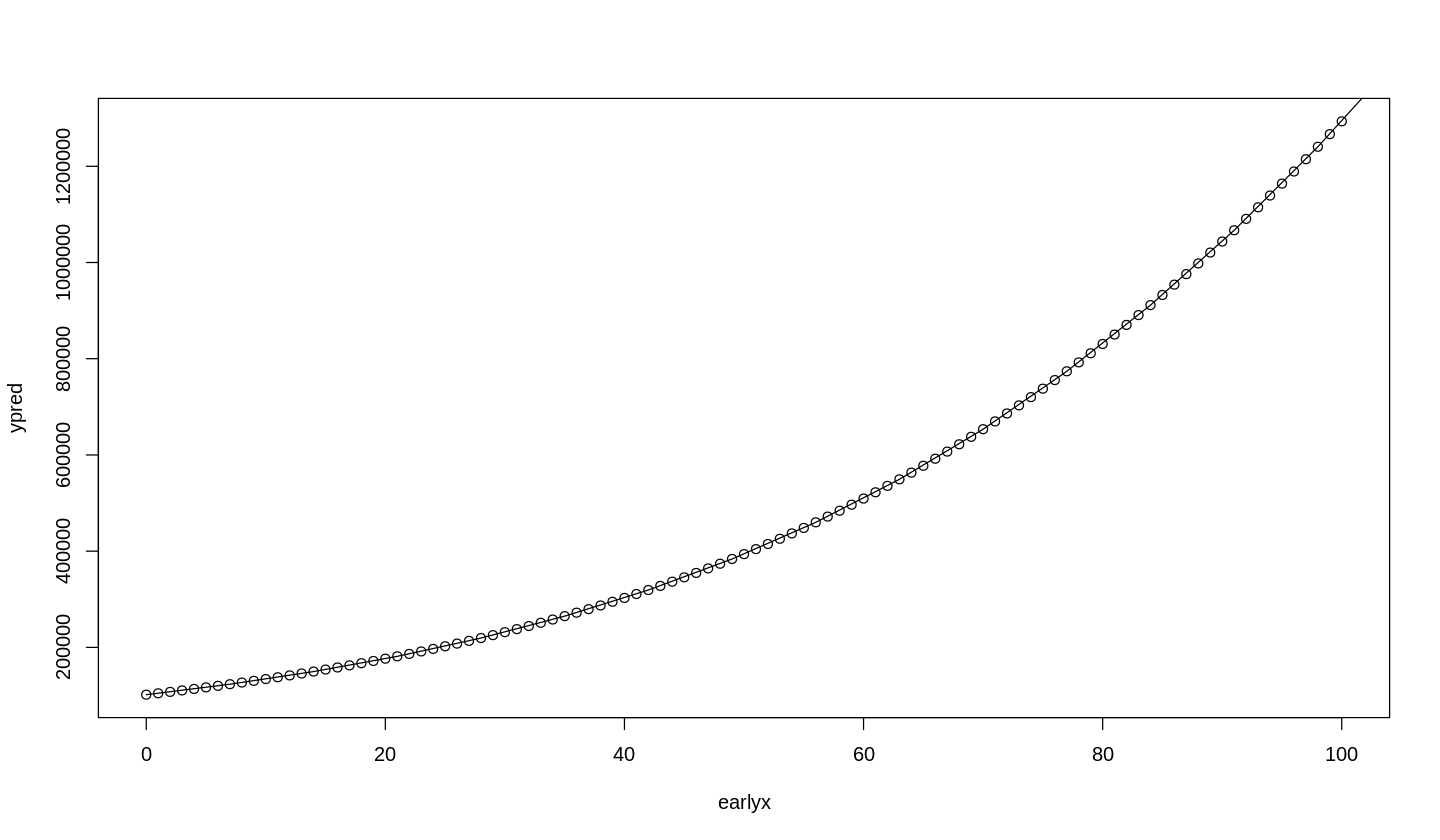

In [65]:
x<-newnewdata$days
y<-newnewdata$numtotal_atleast1dose

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)), 
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:100)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

In [66]:
bbb <- newnewdata|> nls(numtotal_atleast1dose ~ days/(1 + exp((xmid - days)/scal)), 
                            start = list(xmid = 0, scal = 1, height = 100000))
bbb


ERROR: Error in nls(newnewdata, numtotal_atleast1dose ~ days/(1 + exp((xmid - : 'data' must be a list or an environment


In [67]:
nls(numtotal_atleast1dose ~ days, data=newnewdata)

ERROR: Error in object[[3L]][[1L]]: object of type 'symbol' is not subsettable


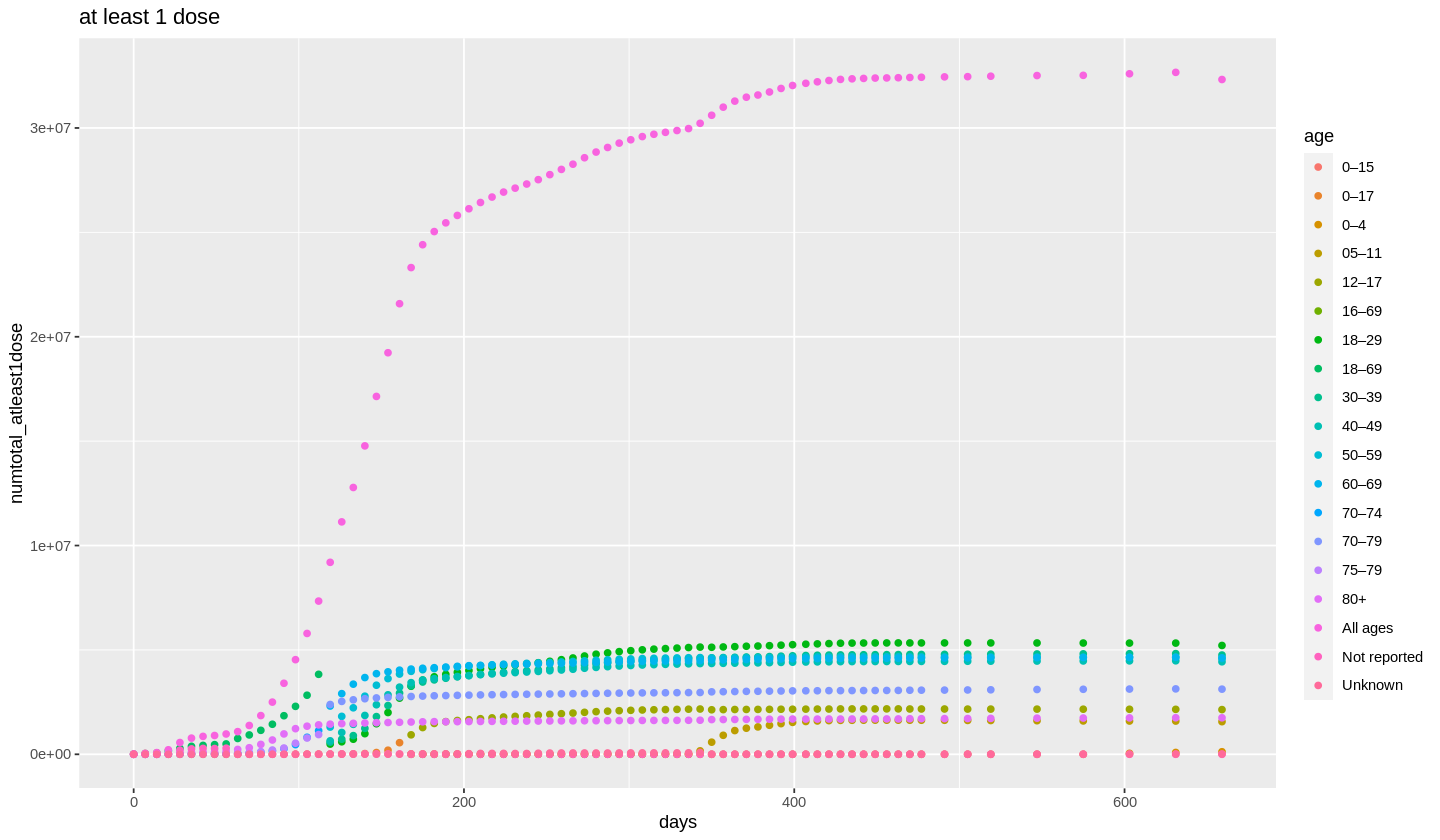

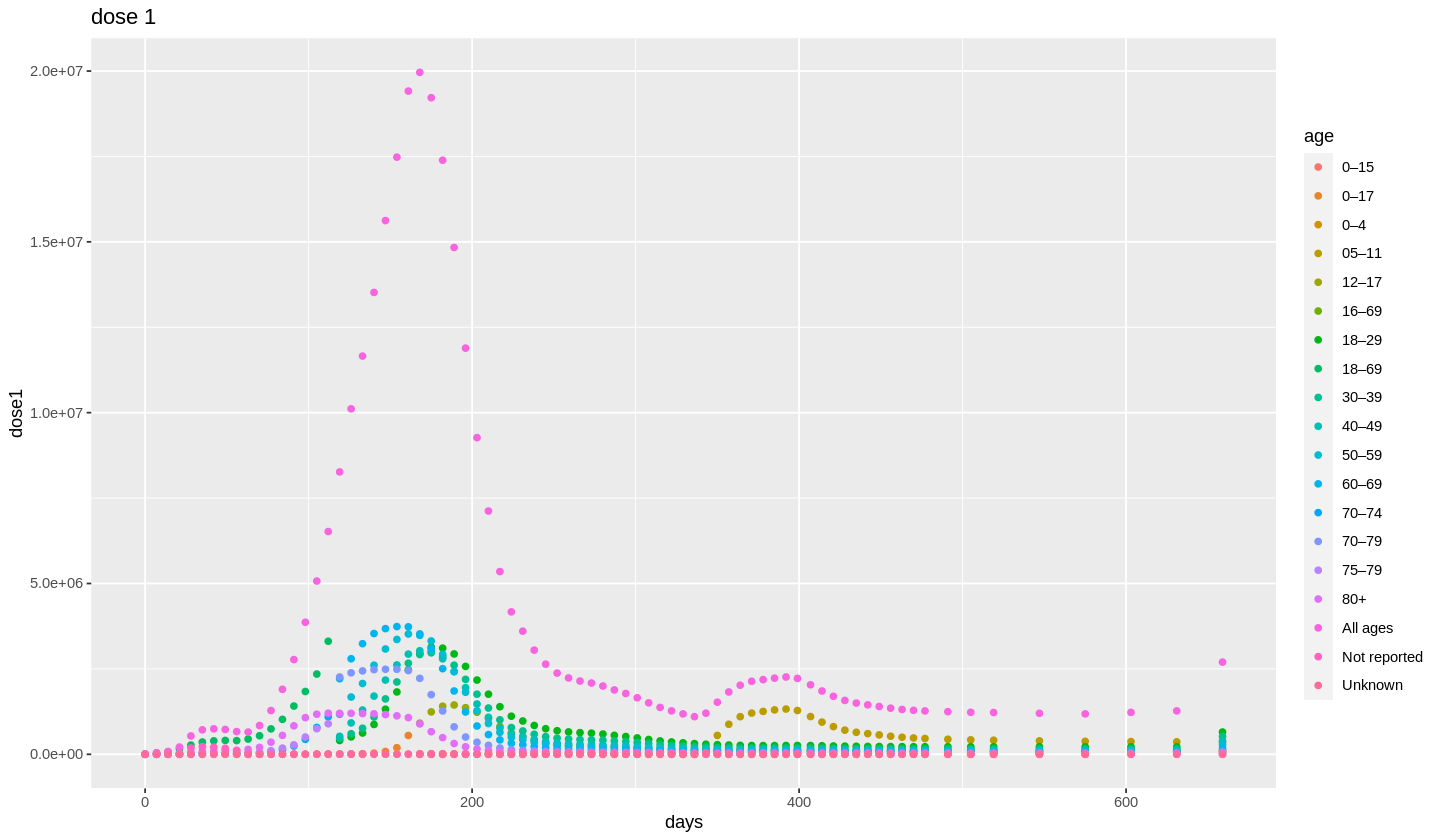

Warning message:
“Removed 564 rows containing missing values (geom_point).”


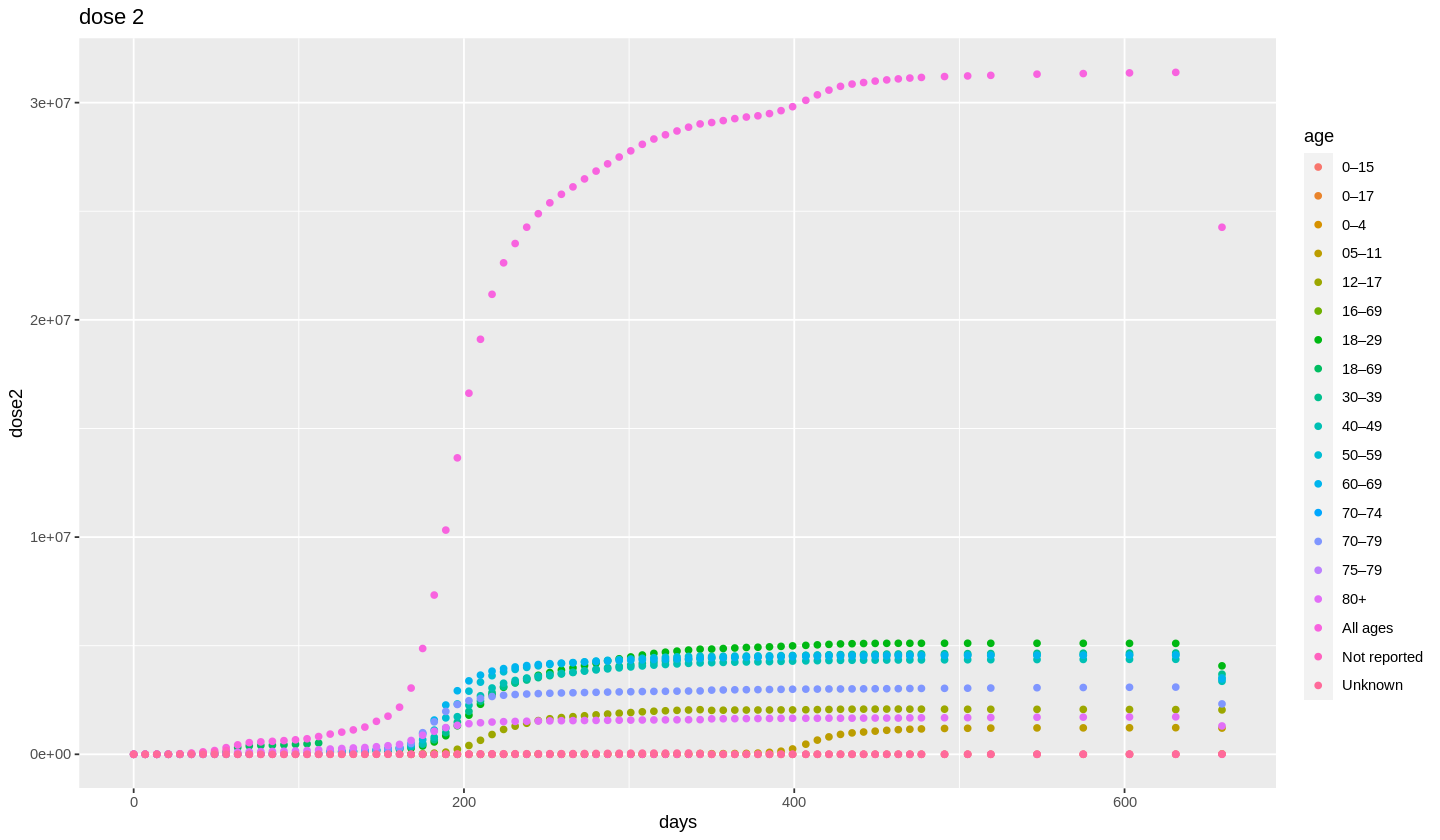

Warning message:
“Removed 629 rows containing missing values (geom_point).”


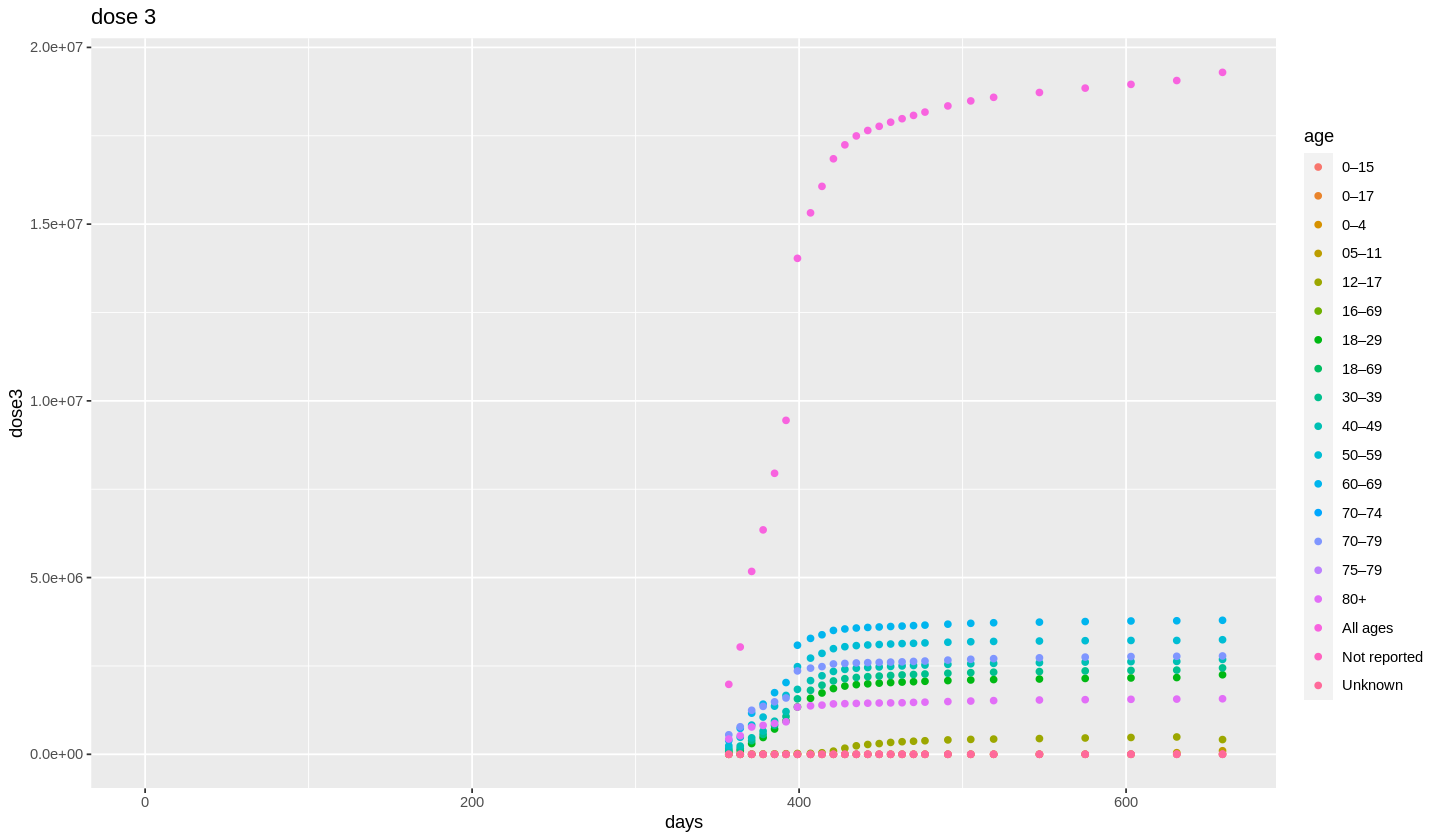

Warning message:
“Removed 866 rows containing missing values (geom_point).”


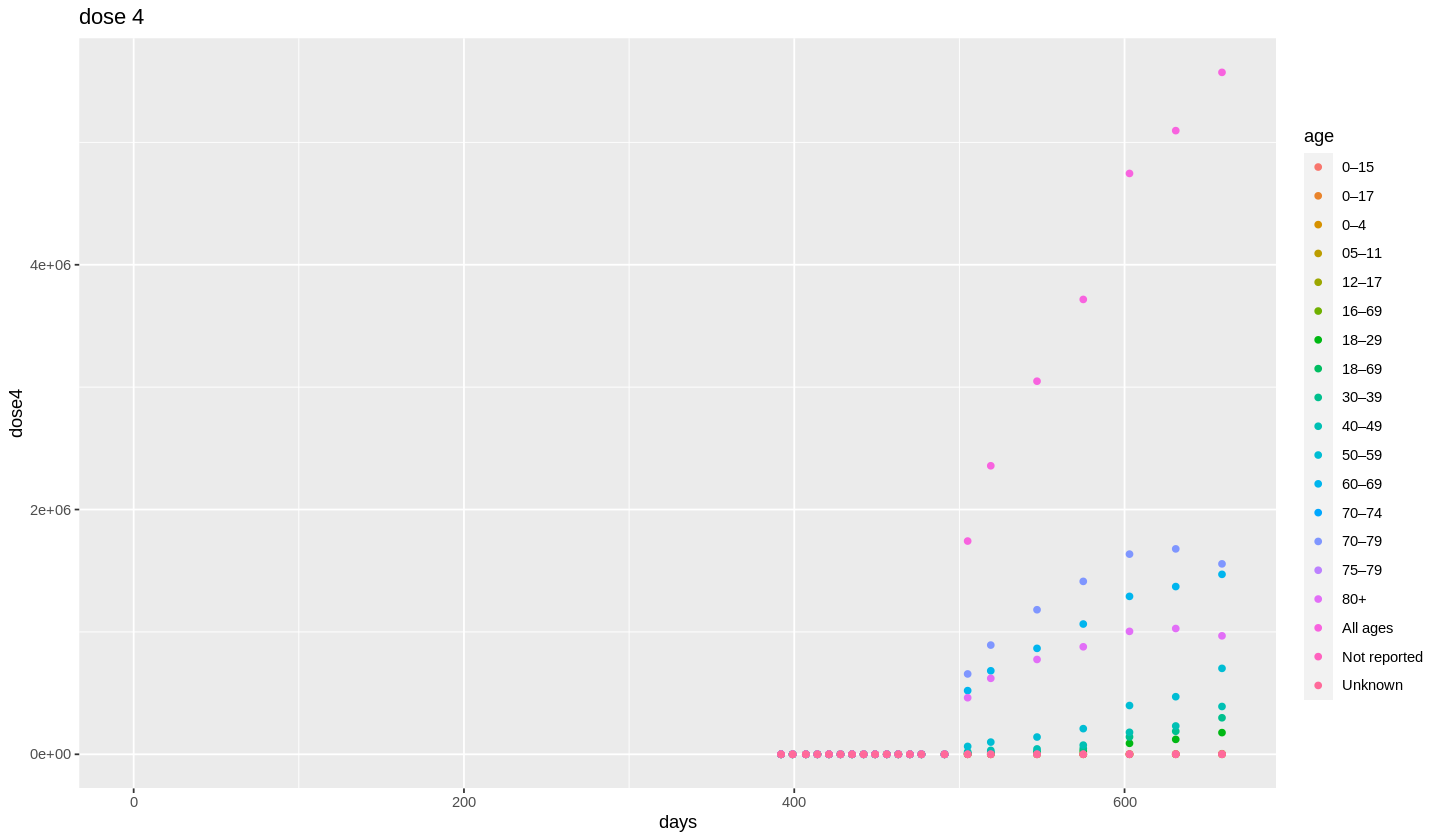

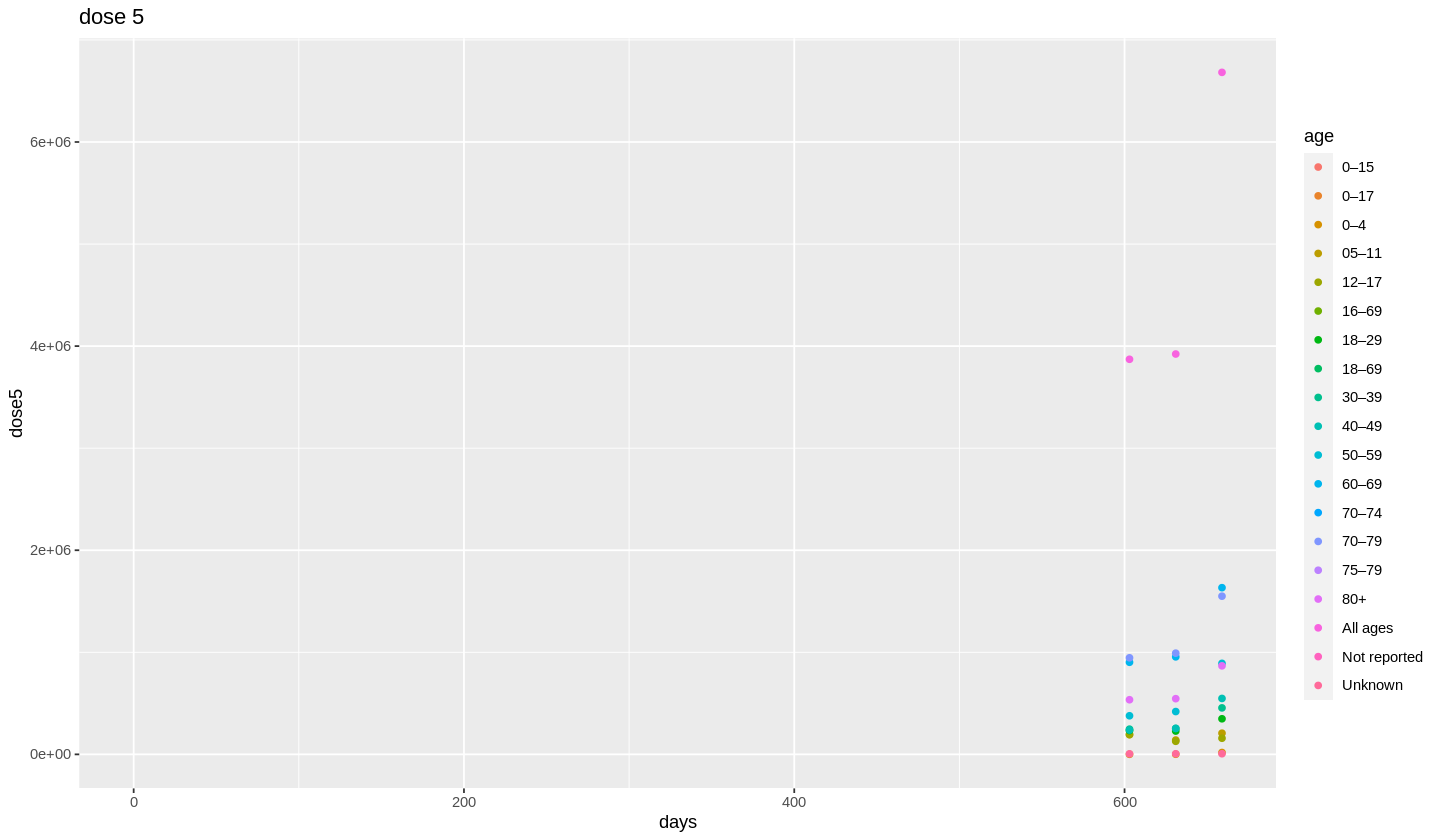

In [68]:
options(repr.plot.width = 12, repr.plot.height = 7)
ggplot(newnewdata, aes(x=days,y=numtotal_atleast1dose,color=age))+
geom_point()+
ggtitle("at least 1 dose")
ggplot(newnewdata, aes(x=days,y=dose1,color=age))+
geom_point()+
ggtitle("dose 1")
ggplot(newnewdata, aes(x=days,y=dose2,color=age))+
geom_point()+
ggtitle("dose 2")
ggplot(newnewdata, aes(x=days,y=dose3,color=age))+
geom_point()+
ggtitle("dose 3")
ggplot(newnewdata, aes(x=days,y=dose4,color=age))+
geom_point()+
ggtitle("dose 4")
ggplot(newnewdata, aes(x=days,y=dose5,color=age))+
geom_point()+
ggtitle("dose 5")

#glm
#nls 

In [69]:
nls(formula, data, start, control, algorithm,
    trace, subset, weights, na.action, model,
    lower, upper, ...)
newnewdata

ERROR: Error in eval(expr, envir, enclos): '...' used in an incorrect context


In [ ]:
#?nls
#pivot longer to make it tibble 
#newnewdata
#?glm

In [ ]:
x<-newnewdata$days
y<-newnewdata$numtotal_atleast1dose

bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)), 
                           start = list(xmid = 100, scal = 10, height = 5000000))
bbb

In [ ]:
coef(bbb)
earlyx<-c(0:100)
ypred<-coef(bbb)[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

firstage3<-newnewdata|>
#    mutate(age=as.factor(age))|>
    filter(age=="0–15")

graph3 <- ggplot(firstage3, aes(x=days, y=numtotal_atleast1dose))+
    geom_point(alpha=0.6)+
geom_line()+
    xlab("Date") +
    ylab("Number of New Vaccinations") +
    theme(text = element_text(size = 12))        

graph3

In [ ]:
firstage4<-newnewdata|>
#    mutate(age=as.factor(age))|>
    filter(age=="16–69")

graph4 <- ggplot(firstage4, aes(x=days, y=numtotal_atleast1dose))+
    geom_point(alpha=0.6)+
geom_line()+
    xlab("Date") +
    ylab("Number of New Vaccinations") +
    theme(text = element_text(size = 12))        

graph4

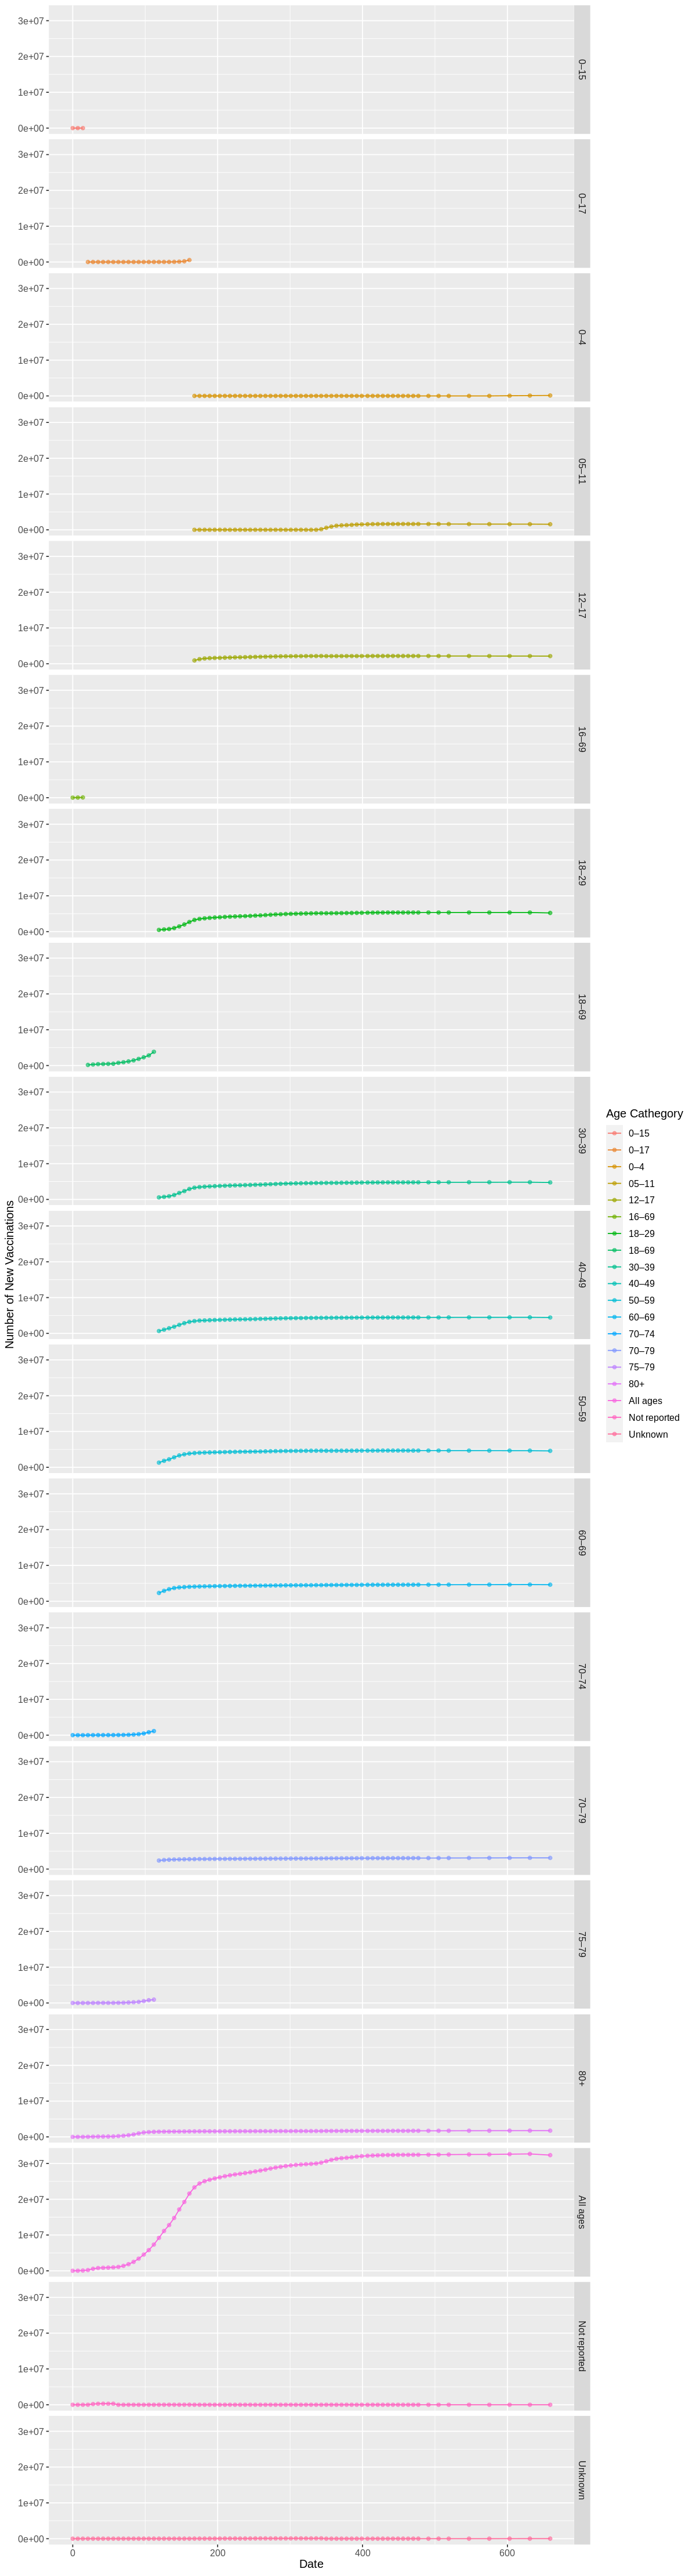

In [18]:
options(repr.plot.width = 10, repr.plot.height = 37)

#selected.1<- selected|>
# filter(age %in% c("0-4", "05-11", "12-17", "18-29", '30-39', '40-49', '50.59','60-69','70-79','80+'))

#selected.1<- selected|>
# filter(age %in% c("0-15", '0-17', '16-69', '18-69','70-74','75-79','80+'))

#selected.1

graph1.1 <- ggplot(newnewdata, aes(x=days, y=numtotal_atleast1dose, color=age))+
    geom_point(alpha=0.6)+
    geom_line()+
    facet_grid(rows = vars(age))+
    xlab("Date") +
    ylab("Number of New Vaccinations") +
    labs(color="Age Cathegory")+
    theme(text = element_text(size = 12))        

graph1.1